## <b><span style='color:#F1C40F'>|</span> Завдання 1</b>

CZE data:

     COUNTRY COUNTRY_GRP  SEX  YEAR  VALUE
239     CZE         NaN  ALL  1975   2.33
240     CZE         NaN  ALL  1976   2.50
241     CZE         NaN  ALL  1977   2.64
242     CZE         NaN  ALL  1978   2.80
243     CZE         NaN  ALL  1979   3.08
244     CZE         NaN  ALL  1980   3.07
245     CZE         NaN  ALL  1981   3.27
246     CZE         NaN  ALL  1982   3.42
247     CZE         NaN  ALL  1983   3.64
248     CZE         NaN  ALL  1984   3.78
249     CZE         NaN  ALL  1985   3.83
250     CZE         NaN  ALL  1986   3.93
251     CZE         NaN  ALL  1987   4.06
252     CZE         NaN  ALL  1988   4.24
253     CZE         NaN  ALL  1989   4.46
254     CZE         NaN  ALL  1990   4.62
255     CZE         NaN  ALL  1991   4.76
256     CZE         NaN  ALL  1992   4.89
257     CZE         NaN  ALL  1993   4.78
258     CZE         NaN  ALL  1994   4.86
259     CZE         NaN  ALL  1995   5.35
260     CZE         NaN  ALL  1996   5.65
261     CZE         Na

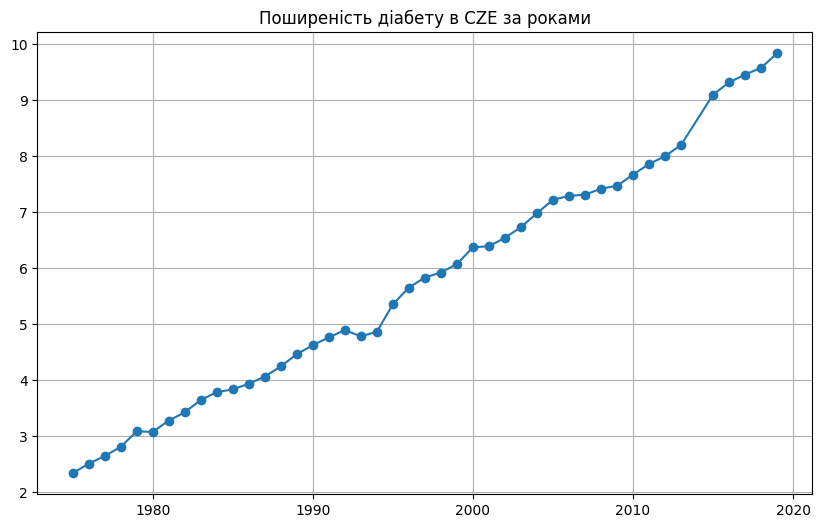

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/Diabets_World.csv")
data.head()

# Беремо 12 країну це CZE і фільтруємо по ній
mask = data['COUNTRY'] == "CZE"
cze_data = data[mask]
print("CZE data:\n\n", cze_data)

# Будуємо графік множини спостережних значень
plt.figure(figsize=(10, 6))
plt.plot(cze_data['YEAR'], cze_data['VALUE'], marker='o', linestyle='-')
plt.title("Поширеність діабету в CZE за роками")
plt.grid(True)
plt.show()

## <b><span style='color:#F1C40F'>|</span> Завдання 2</b>

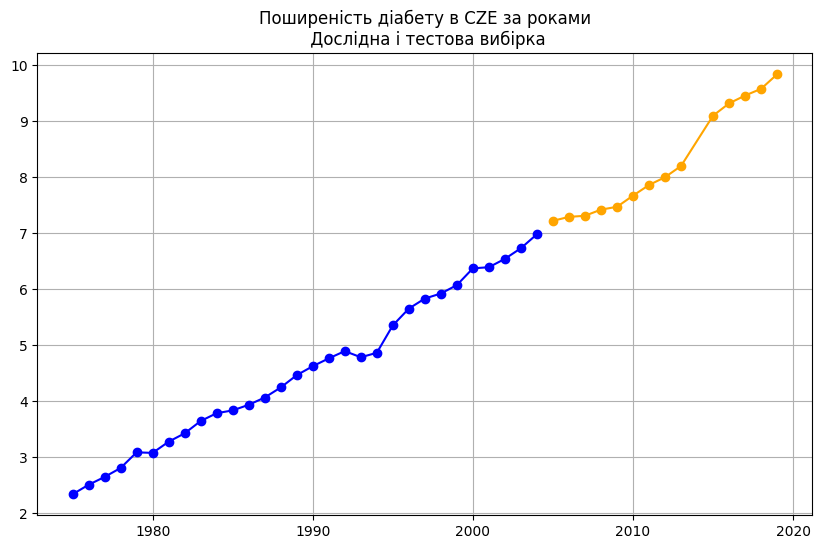

In [2]:
from sklearn.model_selection import train_test_split

# Розділюю вибірку на дві частини (дослідну і тестову)
train_data, test_data = train_test_split(cze_data, test_size=0.3, shuffle=False)

# Представляю графічно
plt.figure(figsize=(10, 6))
plt.plot(train_data['YEAR'], train_data['VALUE'], marker='o', color='blue')
plt.plot(test_data['YEAR'], test_data['VALUE'], marker='o', color='orange')
plt.title("Поширеність діабету в CZE за роками\n Дослідна і тестова вибірка")
plt.grid(True)
plt.show()

## <b><span style='color:#F1C40F'>|</span> Завдання 3</b>

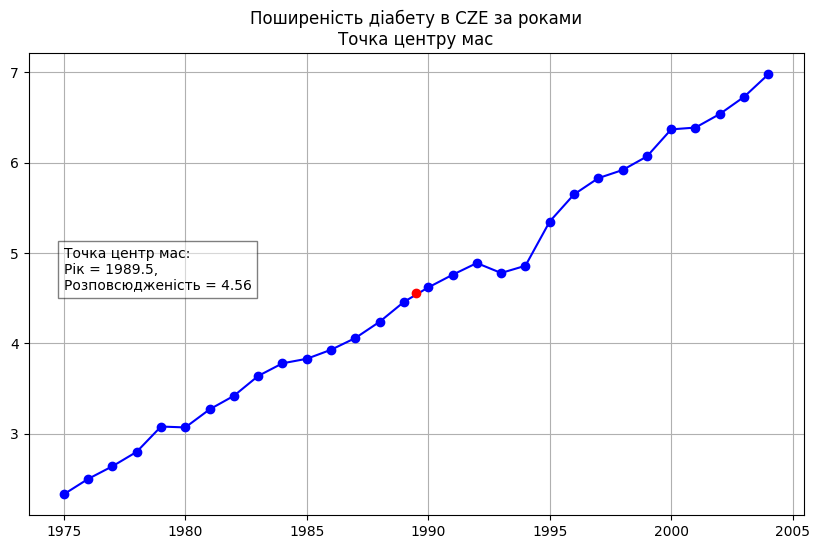

In [3]:
# Знаходимо точку центру мас
center_year = train_data['YEAR'].mean()
center_value = train_data['VALUE'].mean()

# Виводимо графік із точкою центру мас
plt.figure(figsize=(10, 6))
plt.plot(train_data['YEAR'], train_data['VALUE'], marker='o', color='blue')
plt.scatter(center_year, center_value, color='red', zorder=5)
plt.title("Поширеність діабету в CZE за роками\nТочка центру мас")
plt.text(train_data['YEAR'].min(), center_value, f"Точка центр мас:\nРік = {center_year},\nРозповсюдженість = {center_value:.2f}",verticalalignment='bottom', horizontalalignment='left', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.show()

## <b><span style='color:#F1C40F'>|</span> Завдання 4</b>

### <b><span style='color:#F1C40F'>|</span> Завдання a</b>

Формула лінійної регресії:

y = b<sub>0</sub> + b<sub>1</sub>x

- y — залежна змінна (яку ми намагаємось передбачити),
- x — незалежна змінна (фактор, що впливає на y)
- b<sub>0</sub> — вільний член (перетин з віссю y)
- b<sub>1</sub> — коефіцієнт нахилу (показує, як змінюється y при зміні х)


Коефіцієнти b<sub>0</sub> і b<sub>1</sub> обчислюються за допомогою методу найменших квадрат

Коефіцієнти лінійної регресії: b0 = -322.3161, b1 = 0.1643
Сумарна похибка (MSE) для регресії: 0.0387

Таблиця з коефіцієнтами лінійних регресій і їх сумарними похибками:
    shift          b0        b1       mse
0      -5 -321.494614  0.164306  0.038673
1      -4 -321.658920  0.164306  0.038673
2      -3 -321.823226  0.164306  0.038673
3      -2 -321.987532  0.164306  0.038673
4      -1 -322.151838  0.164306  0.038673
5       0 -322.316144  0.164306  0.038673
6       1 -322.480450  0.164306  0.038673
7       2 -322.644756  0.164306  0.038673
8       3 -322.809061  0.164306  0.038673
9       4 -322.973367  0.164306  0.038673
10      5 -323.137673  0.164306  0.038673


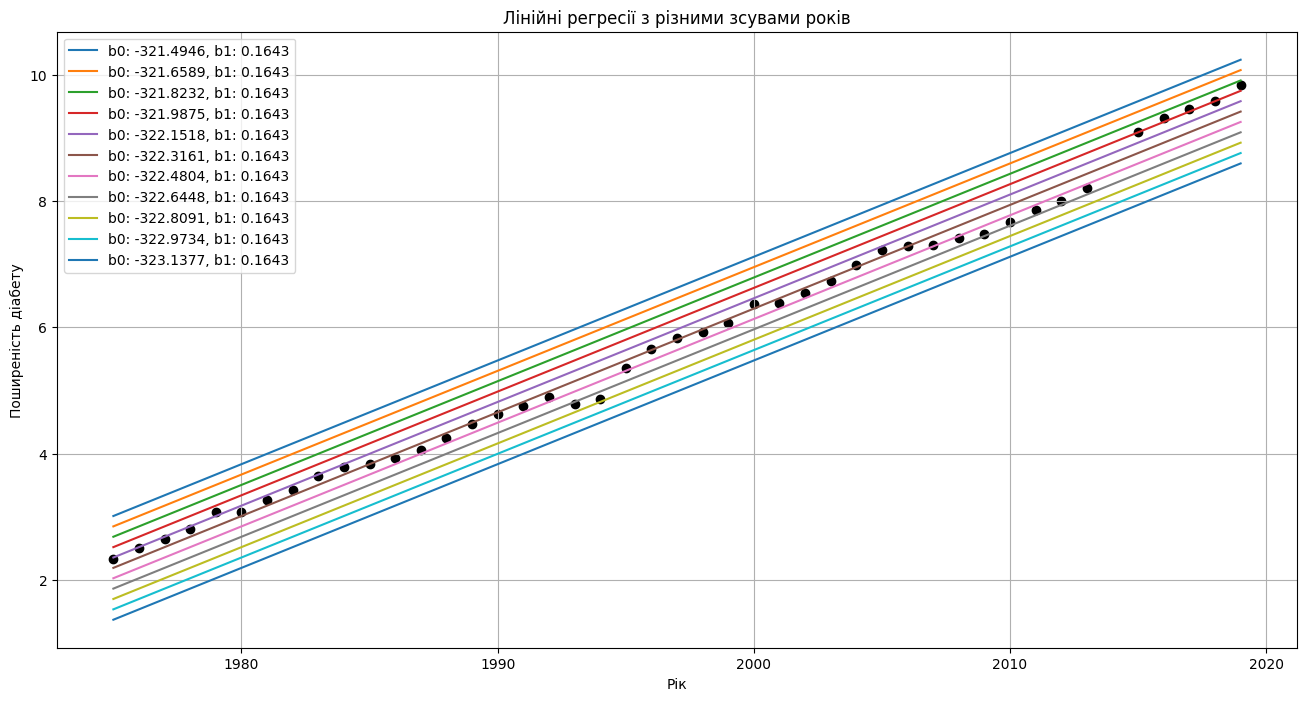

Найкраща лінійна регресія:
Зсув: 0.0
Коефіцієнти: b0 = -322.3161, b1 = 0.1643
Найменша сумарна похибка (MSE): 0.0387


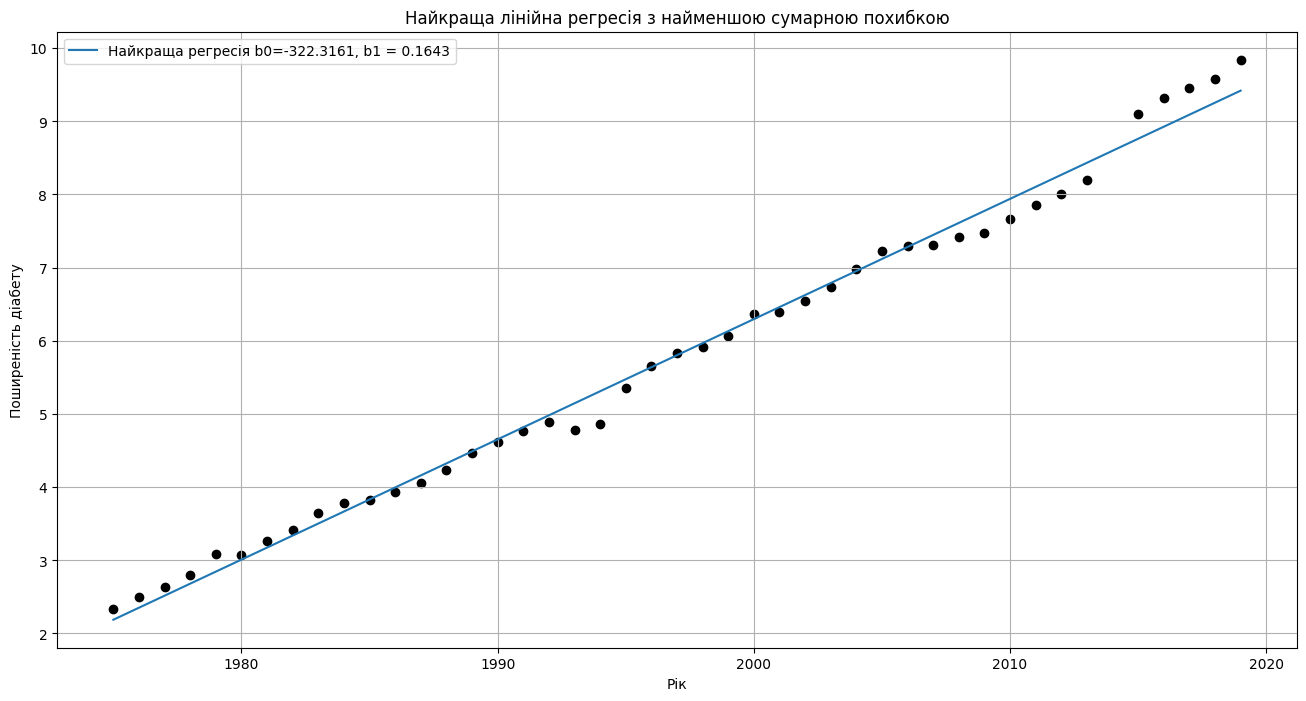

In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 4b. Створення лінійної регресії на всіх даних
X = cze_data[['YEAR']].values
y = cze_data['VALUE'].values

# Створюємо модель лінійної регресії
model = LinearRegression()
model.fit(X, y)

# Коефіцієнти
b0 = model.intercept_
b1 = model.coef_[0]

# Прогнозуємо для всіх даних
y_pred = model.predict(X)

# 4c. Розрахунок сумарної похибки (MSE) для всієї множини даних
mse = mean_squared_error(y, y_pred)

print(f"Коефіцієнти лінійної регресії: b0 = {b0:.4f}, b1 = {b1:.4f}")
print(f"Сумарна похибка (MSE) для регресії: {mse:.4f}")

# 4d. Перебір коефіцієнтів з різними зсувами та побудова таблиці з похибками
results = []

for shift in range(-5, 6):
    shifted_data = cze_data.copy()
    shifted_data['YEAR'] = shifted_data['YEAR'] + shift
    
    # Створюємо модель регресії для зсунутих даних
    shifted_X = shifted_data[['YEAR']].values
    shifted_model = LinearRegression()
    shifted_model.fit(shifted_X, y)
    
    # Коефіцієнти
    shifted_b0 = shifted_model.intercept_
    shifted_b1 = shifted_model.coef_[0]
    
    # Прогноз
    shifted_y_pred = shifted_model.predict(shifted_X)
    
    # Похибка
    shifted_mse = mean_squared_error(y, shifted_y_pred)
    
    results.append(
        {
            'shift': shift,
            'b0': shifted_b0,
            'b1': shifted_b1,
            'mse': shifted_mse
        }
    )

# Виведемо таблицю з результатами
results_df = pd.DataFrame(results)
print("\nТаблиця з коефіцієнтами лінійних регресій і їх сумарними похибками:")
print(results_df)

# 4e. Представлення 10 графіків лінійних регресій із різними зсувами
plt.figure(figsize=(16, 8))

for idx, row in results_df.iterrows():
    plt.plot(cze_data['YEAR'], row['b0'] + row['b1'] * cze_data['YEAR'], label=f'b0: {row["b0"]:.4f}, b1: {row["b1"]:.4f}')

# Додаємо початкові спостережні дані
plt.scatter(cze_data['YEAR'], y, color='black')
plt.title("Лінійні регресії з різними зсувами років")
plt.xlabel("Рік")
plt.ylabel("Поширеність діабету")
plt.legend()
plt.grid(True)
plt.show()

# Знаходимо найкращу лінійну регресію з найменшою сумарною похибкою (MSE)
best_fit = results_df.loc[results_df['mse'].idxmin()]

# Виведемо найкращі коефіцієнти
print(f"Найкраща лінійна регресія:")
print(f"Зсув: {best_fit['shift']}")
print(f"Коефіцієнти: b0 = {best_fit['b0']:.4f}, b1 = {best_fit['b1']:.4f}")
print(f"Найменша сумарна похибка (MSE): {best_fit['mse']:.4f}")

# Візуалізуємо найкращу лінійну регресію
plt.figure(figsize=(16, 8))
plt.plot(cze_data['YEAR'], best_fit['b0'] + best_fit['b1'] * cze_data['YEAR'], label=f"Найкраща регресія b0={best_fit['b0']:.4f}, b1 = {best_fit['b1']:.4f}")
plt.scatter(cze_data['YEAR'], y, color='black')
plt.title("Найкраща лінійна регресія з найменшою сумарною похибкою")
plt.xlabel("Рік")
plt.ylabel("Поширеність діабету")
plt.legend()
plt.grid(True)
plt.show()

## <b><span style='color:#F1C40F'>|</span> Завдання 5</b>

Найкраща лінійна регресія:
Найменша сумарна похибка (MSE): 0.0387


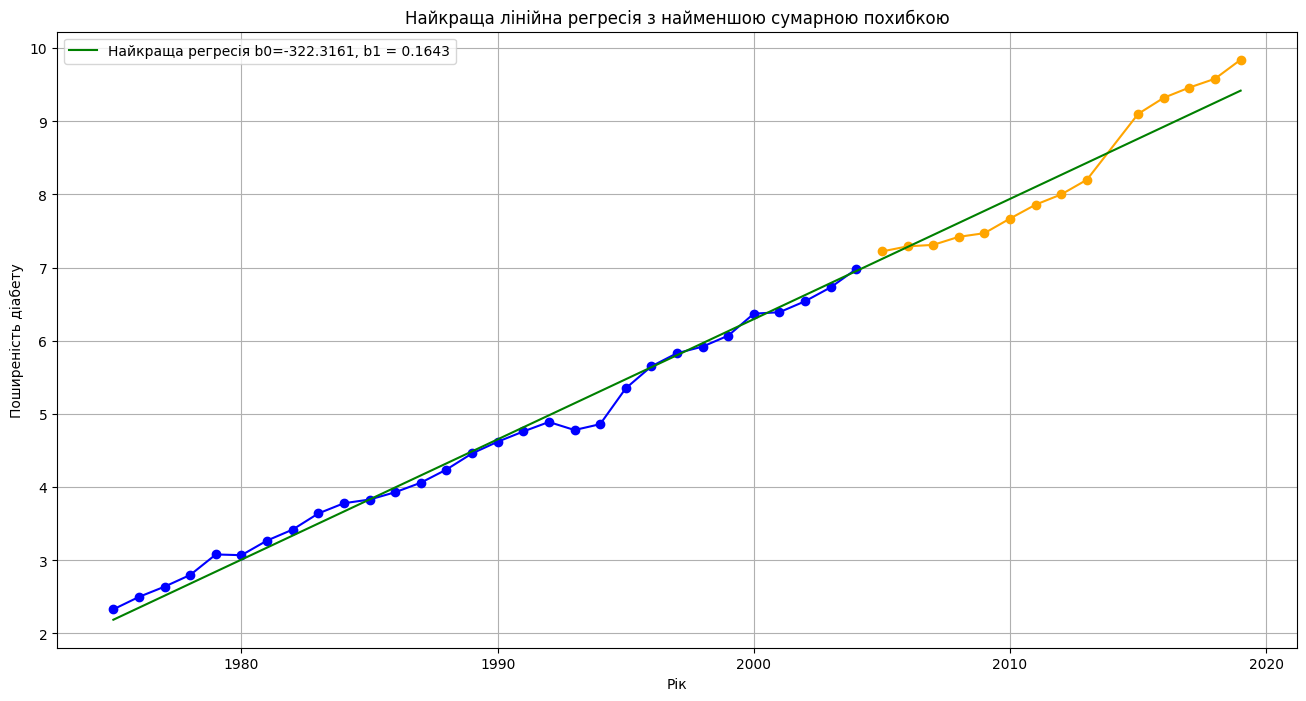

In [52]:
best_fit = results_df.loc[results_df['mse'].idxmin()]

# Виведемо найкращі коефіцієнти
print(f"Найкраща лінійна регресія:")
print(f"Найменша сумарна похибка (MSE): {best_fit['mse']:.4f}")

# Візуалізація найкращої лінійної регресії
plt.figure(figsize=(16, 8))

# Візуалізуємо тренувальні і тестувальні дані
plt.plot(train_data['YEAR'], train_data['VALUE'], marker='o', color='blue')
plt.plot(test_data['YEAR'], test_data['VALUE'], marker='o', color='orange')

# Найкраща регресія
plt.plot(cze_data['YEAR'], best_fit['b0'] + best_fit['b1'] * cze_data['YEAR'], label=f"Найкраща регресія b0={best_fit['b0']:.4f}, b1 = {best_fit['b1']:.4f}", color='green')

plt.title("Найкраща лінійна регресія з найменшою сумарною похибкою")
plt.xlabel("Рік")
plt.ylabel("Поширеність діабету")
plt.legend()
plt.grid(True)
plt.show()

## <b><span style='color:#F1C40F'>|</span> Завдання 6</b>

In [57]:
# Похибки лінійних регресій для тестової вибірки
test_X = test_data[['YEAR']].values
test_y = test_data['VALUE'].values
best_model = LinearRegression().fit(X, y)
test_y_pred = best_model.predict(test_X)
test_mse = mean_squared_error(test_y, test_y_pred)

# Таблиця з похибками
error_df = pd.DataFrame({
    'Year': test_data['YEAR'],
    'Actual Value': test_y,
    'Predicted Value': test_y_pred,
    'Error': test_y - test_y_pred
})

print("Таблиця з похибками лінійних регресій для тестової вибірки:")
error_df

Таблиця з похибками лінійних регресій для тестової вибірки:


,Year,Actual Value,Predicted Value,Error
269,2005,7.22,7.117247,0.102753
270,2006,7.29,7.281553,0.008447
271,2007,7.31,7.445859,-0.135859
272,2008,7.42,7.610165,-0.190165
273,2009,7.47,7.774471,-0.304471
274,2010,7.67,7.938777,-0.268777
275,2011,7.86,8.103083,-0.243083
276,2012,8.00,8.267389,-0.267389
277,2013,8.20,8.431695,-0.231695
278,2015,9.10,8.760307,0.339693


## <b><span style='color:#F1C40F'>|</span> Завдання 7</b>

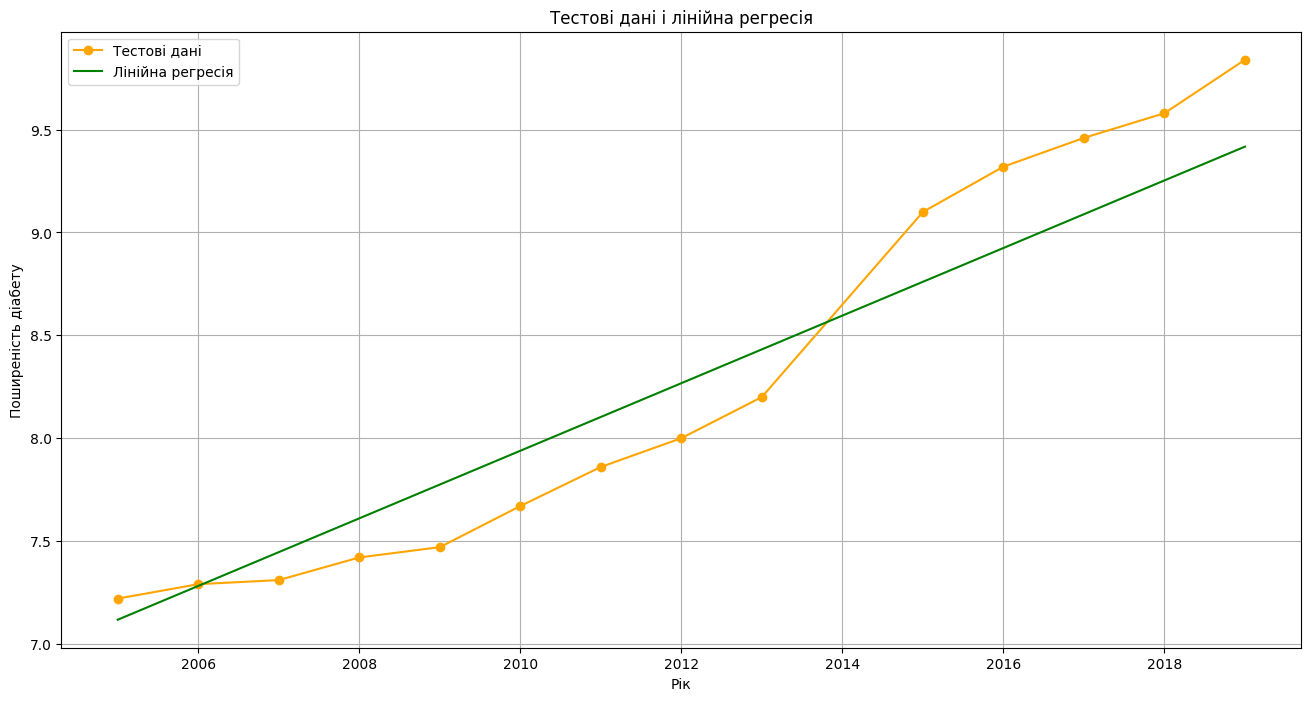

In [58]:
# Графік тестових даних і лінійної регресії
plt.figure(figsize=(16, 8))
plt.plot(test_data['YEAR'], test_y, marker='o', color='orange', label='Тестові дані')
plt.plot(test_data['YEAR'], test_y_pred, color='green', label='Лінійна регресія')
plt.title("Тестові дані і лінійна регресія")
plt.xlabel("Рік")
plt.ylabel("Поширеність діабету")
plt.legend()
plt.grid(True)
plt.show()